# <center>DATA1030: Hands-on Data Science</center>
## <center>Intro to ML</center>


## Mud card
- **"I was curious if we could go a little more in depth with what constitutes a ""good"" dataset to run an ML algorithm on, such as how large of a dataset would be sufficient to ensure that the dataset size itself does not contribute to lower accuracy.**
    - the dataset should have at least a couple of 100 rows (data points) and at least 5-10 features
    - if your dataset is smaller than that, reach out to me
    - the dataset size is very rarely in your control, you just need to work with what you have because it can be very costly to collect more data
    - so focus mostly on the topic of the dataset and find something that interests you
- **I am also curious about resources for webscraping for building a new dataset.**
    - python has a couple of excellent packages for webscraping like Beautiful Soup, Seleneum, the requests package, etc
    - feel free to use any of those
- **Connecting different companies with the machine learning techniques they use.**
    - companies don't usually publicize the techniques they use, it is often considered proprietary information
- **"I just want to know how to use GitHub, because When I was in undergraduate grade, I haven't used it too often.**
    - you can look for online tutorials on how to use github, you can also check out the [CCV](https://ccv.brown.edu/our-work/workshops-and-talks) website, they also offer workshops on git
- **You mentioned how machine learning models have an advantage because traditional code have lots of if statements for the spam filter example. Why are decision trees used? Decision trees can grow to be very messy as well.**
    - yes, they can but that's OK. you don't need to decide on which features to split on, you don't need to code and maintain the if statements yourself
    - clever computer scientists wrote functions for you to take care of it
- **Will all quizzes be group work? Or will some quizzes be individual?**
    - some will be individual
    - there will usually be a group quiz half way through the lecture because students regain some energy and concentration if they move around a bit
    - sitting still for 1.5 hours is not conducive of learning
- **It was a little unclear what it means for ML to not have a "target variable"**
- **If unsupervised learning has no labels, no one variable that you try to predict - then what‚Äôs the point of them?**
    - unsupervised learning is usually used for clustering or customer segmentation
- **In the quiz you mentioned that the multiple outcome prediction is classification and continuous would be regression. However, isn't logistic regression a binary predictor?**
- **Muddiest part was the categorical variable versus continuous, given that there are regression analyses of categorical variables.**
    - binary prediction is classification
    - logistic regression is a bit confusing. logistic regression is an ML algorithm to solve classification problems
    - we will cover this but the logic function is applied to the linear regression model to create an output which is between 0 and 1 - a probability that a certain point belongs to class 0
- **How is a neural network defined as "shallow", "medium", and "deep"? I'm assuming this has something to do with the number of layers, but some high-level view on the same would be helpful.**
    - yes, for a fully connected neural network, shallow, medium, and deep refers to the number of layers
    - if it's another type of architecture (like LSTM, CNN), it's usually defined by the number of neurons
- **what is matrix means for X?**
    - matrix is a mathematical term, it is a rectangular array of numbers arranged in rows and columns

## Learning objectives
By the end of the lecture, you will be able to
- describe the main goals of the ML pipeline 
- list the main steps of the ML pipeline
- explain the bias-variance trade off

## <font color='LIGHTGRAY'> Learning objectives </font>
<font color='LIGHTGRAY'>By the end of the lecture, you will be able to </font>
- **describe the main goals of the ML pipeline**
- <font color='LIGHTGRAY'>list the main steps of the ML pipeline </font>
- <font color='LIGHTGRAY'>explain the bias-variance trade off </font>

### An ML example
- let's assume you just moved to an island and you never had papayas before but it is common on the island
- what do you do? 
- sample some papayas and collect some info
    - for each papaya you try, you collect color, firmness, and whether it tasted good or not
    - classification problem with two features
- once you have enough data, you can train a machine learning model to predict if a new previously unseen papaya is tasty or not based on its color and firmness

### Let's define this problem!
- **the learner's input**
    - Domain set $\mathcal{X}$ - a set of objects we wish to label. In the papaya example: the set of all papayas. $\mathcal{X}$ can be in infinite set or a set that's too large to handle on any computer (e.g., all possible 640x480 images with 3 color channels and 256 possible pixel values)
        - domain points are represented by a vector of features e.g., (color, firmness)
        - domain points are also called instances, and $\mathcal{X}$ is also called the instance space
    - Label set $\mathcal{Y}$ - a set of possible labels. In the papaya example: we restrict our label set to {0,1}, 0 meaning the papaya tastes bad, 1 meaning the papaya tastes good. 
        - such a label set is categorical, i.e., we have a classification problem at hand
        - the label set can be continuous too, e.g., the real number between 0 and 1, meaning that 0.5 is an OK tasting papaya.
        - the label set can also be probabilistic
            - i.e., two papayas with the same color and firmness can sometimes be tasty and sometimes bad
            - this is quite normal, the features you collect usually do not uniquely determine the label
    - Training data $S = ((x_1, y_1),...,(x_m,y_m))$ - a finite sequence of pairs from $\mathcal{X}$, $\mathcal{Y}$. This is what the learner has access to.
        - $S$ is also called the training set, and examples in $S$ are also called training examples
        - $X = (x_1,...,x_m)$ is the feature matrix which is usually a 2D matrix, and $Y = (y_1,...,y_m)$ is the target variable which is a vector.
        
        
        
- **the learner's output**
    - a prediction rule $h: \mathcal{X} \rightarrow \mathcal{Y}$ - this is also called the predictor, a hypothesis, or in the papaya example a classifier. It would be a regressor if $\mathcal{Y}$ was continuous. In the papaya example, the predictor is the rule that our learner will employ to predict if a papaya will be tasty based on color and firmness as they examine it e.g., in the farmer's market or before picking the fruit from the tree. 
    - this prediction rule is generated based on $S$ so $h: X \rightarrow Y$ is more appropriate
    - once the prediction rule is determined, we can use it to predict the label to previously unseen data

## How is $S$ used?
- in ML, you only use part of $S$ to train the model
- you hold out some fraction of $S$ to calculate what's called the **generalization error**
- it measures how well the model is expected to perform on previously unseen data
- it helps to avoid models that overfit or underfit
    - overfit: model is too complex, it performs very well on the training set but it doesn't generalize to previously unseen data
    - underfit: the model is too simple, it performs poorly on te training set and on previously unseen data as well

## Recap the goals:
- use the training data (X and y) to develop a <font color='red'>model</font> which can <font color='red'>accurately</font> predict the target variable (y_new') for previously unseen data (X_new)
    - model performance or 'accuracy' is a metric you need to choose to measure model performance and objectively compare various models
- measure the generalization error: measure how well the model is expected to perform on previously unseen data

## <font color='LIGHTGRAY'>Learning objectives</font>
<font color='LIGHTGRAY'>By the end of the lecture, you will be able to</font>
- <font color='LIGHTGRAY'>describe the main goals of the ML pipeline </font>
- **list the main steps of the ML pipeline**
- <font color='LIGHTGRAY'>explain the bias-variance trade off</font>

## The steps

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to be transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
**4. Choose an evaluation metric**: depends on the priorities of the stakeholders
   - often requires quite a bit of thinking and ethical considerations
     
**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models
   - start with simple models like linear or logistic regression
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## Quiz

## <font color='LIGHTGRAY'>Learning objectives</font>
<font color='LIGHTGRAY'>By the end of the lecture, you will be able to</font>
- <font color='LIGHTGRAY'>describe the main goals of the ML pipeline </font>
- <font color='LIGHTGRAY'>list the main steps of the ML pipeline</font>
- **explain the bias-variance trade off**

## Bias-variance tradeoff illustrated through a simple ML pipeline

In [1]:
# import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pylab as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline

# scikit-learn code is reproducable is the random seed is fixed.
np.random.seed(2)

# read in the data
# our toy dataset, we don't know how it was generated.
df = pd.read_csv('data/toy_data.csv')

X = df[['x1','x2']].values
y = df['y'].values

print(np.shape(X))
print(np.shape(y))
print(np.unique(y,return_counts=True))

(100, 2)
(100,)
(array([0, 1]), array([42, 58]))


**1. Exploratory Data Analysis (EDA)**

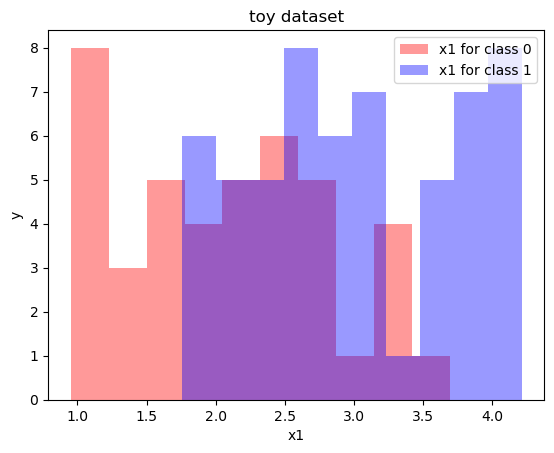

In [2]:
plt.hist(X[y==0,0],alpha=0.4,color='r',label='x1 for class 0')
plt.hist(X[y==1,0],alpha=0.4,color='b',label='x1 for class 1')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('toy dataset')
plt.legend()
plt.show()

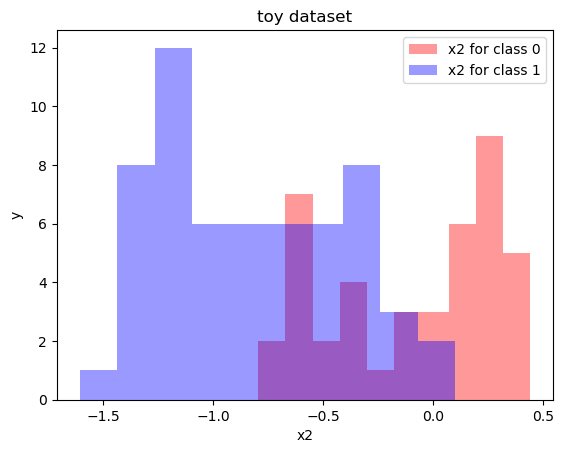

In [3]:
plt.hist(X[y==0,1],alpha=0.4,color='r',label='x2 for class 0')
plt.hist(X[y==1,1],alpha=0.4,color='b',label='x2 for class 1')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('toy dataset')
plt.legend()
plt.show()

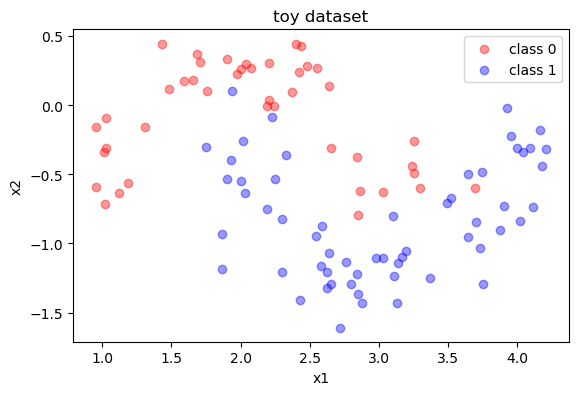

In [4]:
plt.scatter(X[y==0,0],X[y==0,1],color='r',label='class 0',alpha=0.4)
plt.scatter(X[y==1,0],X[y==1,1],color='b',label='class 1',alpha=0.4)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('toy dataset')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

**2. Split the data into different sets**

In [5]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [6]:
X_train, X_other, y_train, y_other = train_test_split(X,y,test_size=0.4)
print(np.shape(X_other),np.shape(y_other))
print('train:',np.shape(X_train),np.shape(y_train))

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.5)
print('val:',np.shape(X_val),np.shape(y_val))
print('test:',np.shape(X_test),np.shape(y_test))

(40, 2) (40,)
train: (60, 2) (60,)
val: (20, 2) (20,)
test: (20, 2) (20,)


**3. Preprocess the data**

In [7]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual fea

In [8]:
scaler = StandardScaler().fit(X_train)
# the scaler object contains the feature means and variations in the training set
print(scaler.mean_)
print(scaler.var_)

# the scaler is used to transform the sets
X_train_prep = scaler.transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)


[ 2.61729782 -0.55283401]
[0.74350517 0.32379089]


**4. Choose an evaluation metric**

In [9]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

## Quiz

**5. Choose one or more ML techniques**

In [10]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

**6. Tune the hyperparameters of your ML models (aka cross-validation)**

In [11]:
Cs = np.logspace(-1,3,13)
print(Cs)
train_scores = []
validation_scores = []
models = []
for C in Cs:
    classifier = SVC(kernel='rbf',C = C, probability=True) # this is our classifier
    classifier.fit(X_train_prep,y_train) # the model is fitted to the training data
    
    y_train_pred = classifier.predict(X_train_prep)
    train_accuracy = accuracy_score(y_train,y_train_pred) # calculate the validation accuracy
    train_scores.append(train_accuracy)
    
    y_val_pred = classifier.predict(X_val_prep) # predict the validation set
    validation_accuracy = accuracy_score(y_val,y_val_pred) # calculate the validation accuracy
    validation_scores.append(validation_accuracy)
    
    models.append(classifier)
    print(C, train_accuracy, validation_accuracy)


[1.00000000e-01 2.15443469e-01 4.64158883e-01 1.00000000e+00
 2.15443469e+00 4.64158883e+00 1.00000000e+01 2.15443469e+01
 4.64158883e+01 1.00000000e+02 2.15443469e+02 4.64158883e+02
 1.00000000e+03]
0.1 0.8166666666666667 0.8
0.21544346900318834 0.8333333333333334 0.8
0.46415888336127786 0.8666666666666667 0.85
1.0 0.9333333333333333 0.85
2.1544346900318834 0.9833333333333333 0.85
4.6415888336127775 0.9833333333333333 0.85
10.0 0.9666666666666667 0.85
21.54434690031882 0.9833333333333333 0.85
46.41588833612777 0.9833333333333333 0.9
100.0 0.9833333333333333 0.85
215.44346900318823 0.9833333333333333 0.85
464.15888336127773 1.0 0.8
1000.0 1.0 0.8


## The bias - variance tradeoff

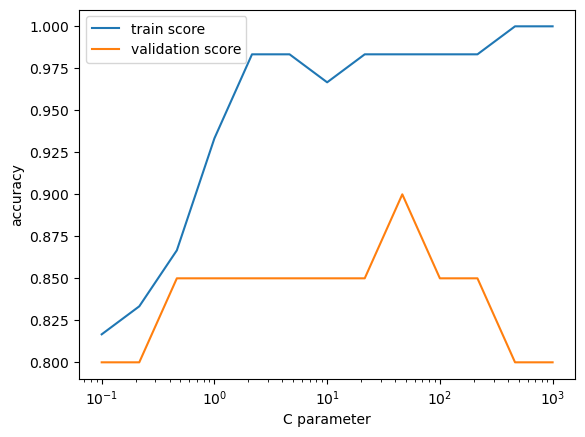

In [12]:
plt.plot(Cs,train_scores,label='train score')
plt.plot(Cs,validation_scores,label='validation score')
plt.semilogx()
plt.legend()
plt.xlabel('C parameter')
plt.ylabel('accuracy')
plt.show()

- **high bias model** (aka underfitting)
    - it performs poorly on the train and validation sets
    - small C values in the example above
- **high variance model** (aka overfitting)
    - it performs very well on the training set but it performs poorly on the validation set
    - high C
- the goal of the parameter tuning is to find the balance between bias and variance
    - usually the best model is the one with the best validation score
    - C = 46 in our case

# Quiz

### How does the best model perform on the test set?
- this score tells us how well the model generalizes to previously unseen data because the test set was not touched before
- usually it is close to the best validation score

In [13]:
y_test_pred = models[-5].predict(X_test_prep)
print(accuracy_score(y_test, y_test_pred))

0.95


**7. Interpret your model**
- with two features, this is easy
- plot the decision boundary and probabilities

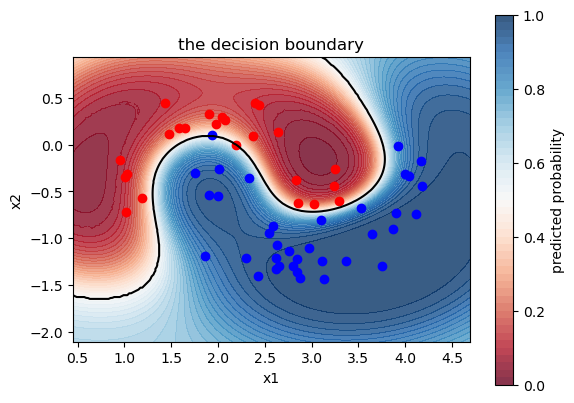

In [14]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# use the best model with C = 46
classifier = models[-5] 
# scale the data before predicting! this is very important!
Z = classifier.predict_proba(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1] 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z,vmin=0,vmax=1,levels=[0.5],colors=['k'])
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.02,0.02))
plt.colorbar(ticks=[0,0.2,0.4,0.6,0.8,1],label='predicted probability')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='r',label='class 0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='b',label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('the decision boundary')
plt.gca().set_aspect('equal')
plt.savefig('figures/decision_boundary.jpg',dpi=150)
plt.show()

# Mud card